In [2]:
###### import expected libaries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
### load data via pandas
df_o = pd.read_csv('observations.csv')
df_s = pd.read_csv('species_info.csv')


In [42]:
#inspect column names of observations
print(df_o.head())
print(len(df_o))


            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85
23296


In [40]:
#inspect column names of species info
print(df_s.head())
print(len(df_s))

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  
5824


In [12]:
print('below is the values of na in observations df')
print(df_o.isna().sum())
print('below is the values of na in species_info df')
print(df_s.isna().sum())

## conclusion there's lots of na for conservation_status in species_info
#what is the length of the species info df? what percent of organisms have a conservation status?

scientific_name    0
park_name          0
observations       0
dtype: int64
below is the values of na in sp
category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64


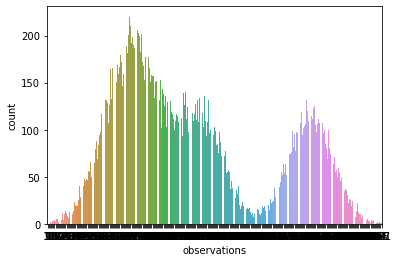

In [34]:
sns.countplot(x = 'observations', data = df_o)

plt.show()

In [18]:
## length of df_s is 5824 and there are 5633 nan values for conservation status
#should be 191 species with concern status

print(len(df_s))
print(5824 - 5633)

5824
191
[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [23]:
species_counts = df_s.groupby('conservation_status').common_names.count().reset_index()
print(species_counts)
print(species_counts.sum())

##### Check

  conservation_status  common_names
0          Endangered            16
1         In Recovery             4
2  Species of Concern           161
3          Threatened            10
conservation_status    EndangeredIn RecoverySpecies of ConcernThreatened
common_names                                                         191
dtype: object


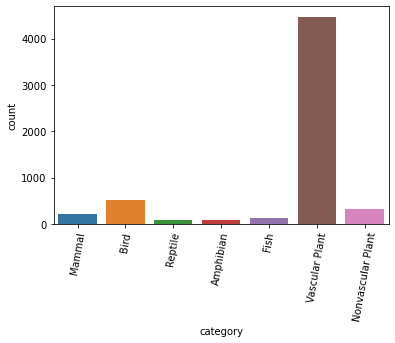

In [30]:
##count of each type of organism

sns.countplot(x="category", data=df_s)
plt.xticks(rotation = 80)
plt.show()

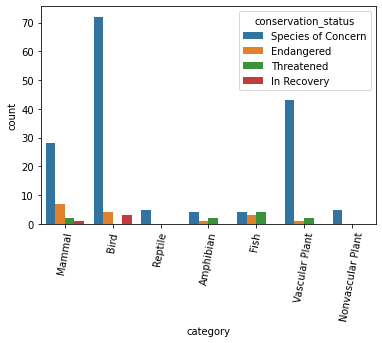

In [37]:
sns.countplot(x="category", hue="conservation_status", data=df_s)
plt.xticks(rotation = 80)
plt.show()

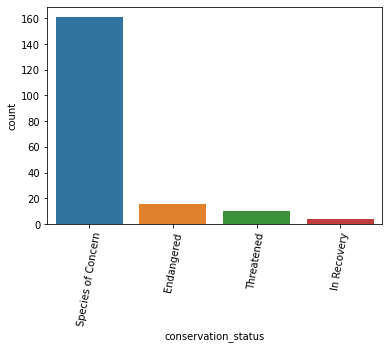

In [31]:
sns.countplot(x = 'conservation_status', data = df_s)
plt.xticks(rotation = 80)
plt.show()

In [43]:
### join two dataframes where the both have "scientific name"

# inner join
merged_df = pd.merge(df_o, df_s, on='scientific_name', how='inner')
  
# display dataframe
print(merged_df.head())
print(len(merged_df))

      scientific_name                            park_name  observations  \
0  Vicia benghalensis  Great Smoky Mountains National Park            68   
1  Vicia benghalensis               Yosemite National Park           148   
2  Vicia benghalensis            Yellowstone National Park           247   
3  Vicia benghalensis                  Bryce National Park           104   
4      Neovison vison  Great Smoky Mountains National Park            77   

         category                        common_names conservation_status  
0  Vascular Plant  Purple Vetch, Reddish Tufted Vetch                 NaN  
1  Vascular Plant  Purple Vetch, Reddish Tufted Vetch                 NaN  
2  Vascular Plant  Purple Vetch, Reddish Tufted Vetch                 NaN  
3  Vascular Plant  Purple Vetch, Reddish Tufted Vetch                 NaN  
4          Mammal                       American Mink                 NaN  
25632


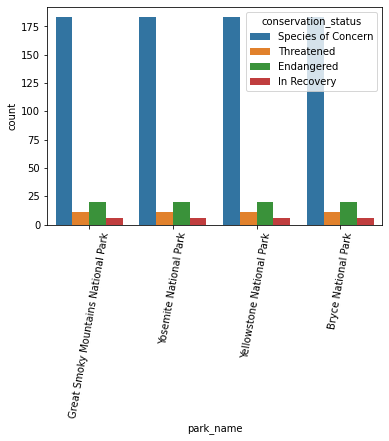

In [39]:
sns.countplot(x="park_name", hue="conservation_status", data=merged_df)
plt.xticks(rotation = 80)
plt.show()